In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sort_values(ascending=False)

WORK_PROVINCE        3248
WORK_CITY            2269
SUM_YR_1              551
AGE                   420
SUM_YR_2              138
WORK_COUNTRY           26
GENDER                  3
MEMBER_NO               0
LAST_FLIGHT_DATE        0
Points_Sum              0
avg_discount            0
EXCHANGE_COUNT          0
MAX_INTERVAL            0
AVG_INTERVAL            0
LAST_TO_END             0
BP_SUM                  0
SEG_KM_SUM              0
FFP_DATE                0
FLIGHT_COUNT            0
LOAD_TIME               0
FFP_TIER                0
FIRST_FLIGHT_DATE       0
Point_NotFlight         0
dtype: int64

In [ ]:
# Remove missing values
df = df.dropna()
df.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,58255.0,31545.754854,18187.496028,3.0,15787.500000,31603.000000,47315.500000,62988.0
FFP_TIER,58255.0,4.104849,0.378182,4.0,4.000000,4.000000,4.000000,6.0
AGE,58255.0,42.228736,9.761965,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,58255.0,12.067634,14.236472,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,58255.0,11066.303682,16283.209178,0.0,2608.000000,5832.000000,13022.000000,505308.0
SUM_YR_1,58255.0,5366.827963,8103.595049,0.0,1016.000000,2808.000000,6591.500000,239560.0
SUM_YR_2,58255.0,5694.530650,8710.724917,0.0,846.000000,2846.000000,6958.000000,234188.0
SEG_KM_SUM,58255.0,17353.000910,20969.886756,368.0,4904.000000,10237.000000,21571.500000,580717.0
LAST_TO_END,58255.0,171.255309,180.560120,1.0,28.000000,104.000000,258.000000,731.0
AVG_INTERVAL,58255.0,67.937285,77.449058,0.0,23.700000,44.833333,82.000000,728.0


In [ ]:
# Remove age > 100 because anomaly
df = df[df.AGE < 100]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,58254.0,31545.948519,18187.592068,3.0,15787.250000,31603.500000,47315.750000,62988.0
FFP_TIER,58254.0,4.104851,0.378185,4.0,4.000000,4.000000,4.000000,6.0
AGE,58254.0,42.227572,9.758010,6.0,35.000000,41.000000,48.000000,92.0
FLIGHT_COUNT,58254.0,12.067721,14.236579,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,58254.0,11066.306623,16283.348925,0.0,2608.000000,5832.000000,13022.500000,505308.0
SUM_YR_1,58254.0,5366.815086,8103.664008,0.0,1016.000000,2808.000000,6591.750000,239560.0
SUM_YR_2,58254.0,5694.578827,8710.791921,0.0,846.000000,2846.000000,6958.000000,234188.0
SEG_KM_SUM,58254.0,17353.057558,20970.062287,368.0,4904.000000,10236.500000,21571.750000,580717.0
LAST_TO_END,58254.0,171.252051,180.559958,1.0,28.000000,104.000000,258.000000,731.0
AVG_INTERVAL,58254.0,67.937587,77.449688,0.0,23.700000,44.825758,82.000000,728.0


In [ ]:
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
df[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,58254,58254,58254,58254,58254,58254,58254,58254
unique,2,2944,1127,105,3062,3399,1,731
top,Male,guangzhou,guangdong,CN,1/13/2011,2/16/2013,3/31/2014,3/31/2014
freq,44434,9283,17328,54953,179,88,58254,915


In [ ]:
# The date 29-2-2014 is invalid, so we drop it
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,1/20/2013,1/20/2013,Female,4,beijing,.,CN,35.0,3/31/2014,...,0.0,3848,1/20/2013,437,0.000000,0,0,0.000000,0,0
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0


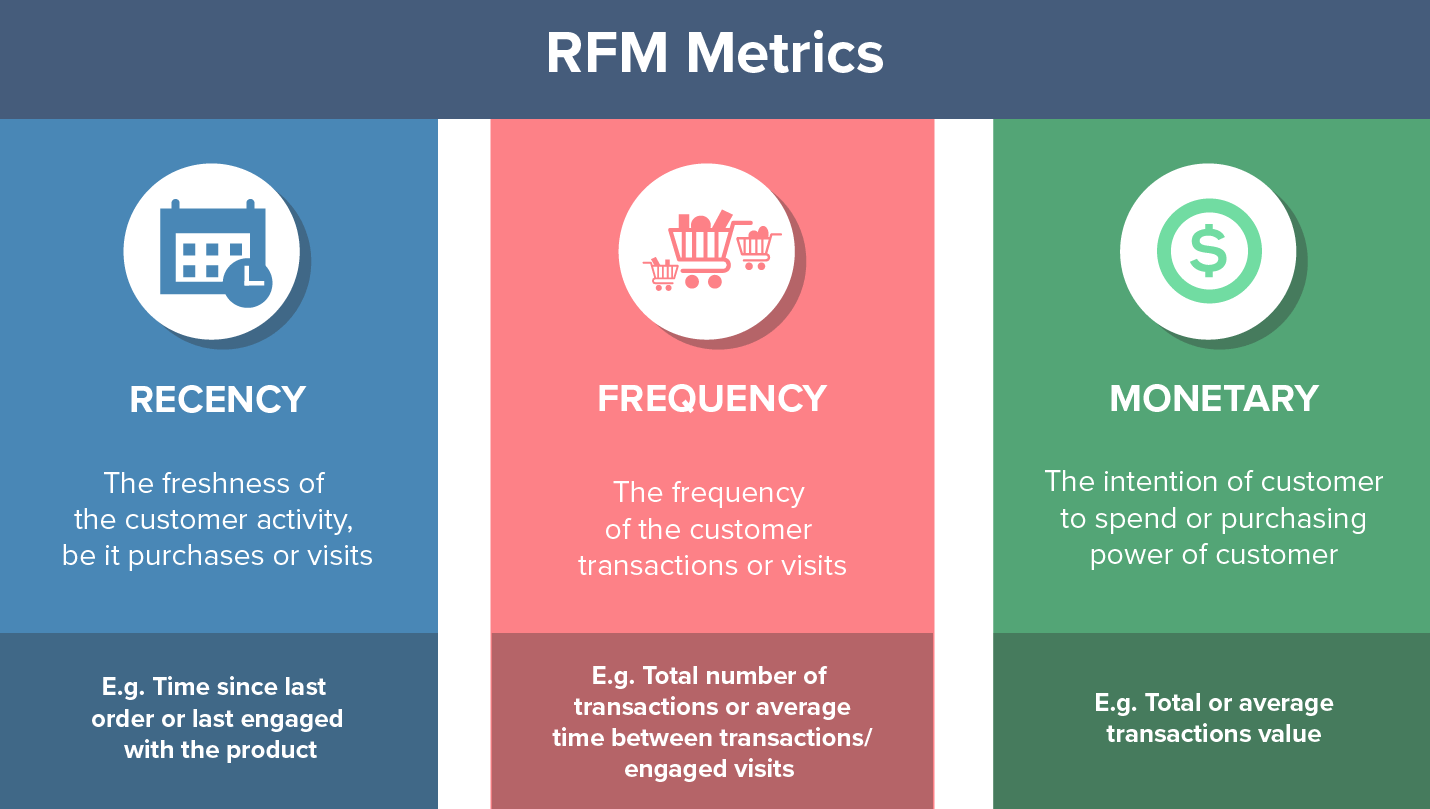
**R (RECENCY)** : Jumlah bulan sejak penerbangan terakhir anggota dari akhir waktu observasi. -> Use column `LAST_TO_END` <br>
**F (FREQUENCY)** : Total berapa kali user telah terbang selama periode observasi. ->  Use column `FLIGHT_COUNT` <br>
**M (MONETERY)** : Miles atau jarak yang terakumulasi selama waktu observasi user. -> Use column `SEG_KM_SUM` <br><br>

Kita juga dapat menambahkan Loyalty sebagai metric <br><br>
**L (LOYALTY)** : Jangka waktu keanggotaaan <br>
Gunakan column FFP_DATE (Frequent Flyer Program Join Date) dan LOAD_TIME (Tanggal Data Diambil)

In [ ]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

In [ ]:
df['MEMBER_DURATION'] = ((df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30).astype(int)

In [ ]:
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57859 entries, 0 to 62986
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          57859 non-null  int64         
 1   FFP_DATE           57859 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  57859 non-null  datetime64[ns]
 3   GENDER             57859 non-null  object        
 4   FFP_TIER           57859 non-null  int64         
 5   WORK_CITY          57859 non-null  object        
 6   WORK_PROVINCE      57859 non-null  object        
 7   WORK_COUNTRY       57859 non-null  object        
 8   AGE                57859 non-null  float64       
 9   LOAD_TIME          57859 non-null  datetime64[ns]
 10  FLIGHT_COUNT       57859 non-null  int64         
 11  BP_SUM             57859 non-null  int64         
 12  SUM_YR_1           57859 non-null  float64       
 13  SUM_YR_2           57859 non-null  float64       
 14  SEG_KM

In [ ]:
df_lrfm = df[['MEMBER_DURATION', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
df_lrfm.columns =['Loyalty', 'Recency', 'Frequency', 'Monetary']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = ['Loyalty', 'Recency', 'Frequency', 'Monetary']

X_std = StandardScaler().fit_transform(df_lrfm)
df_std = pd.DataFrame(data = X_std, columns = features)
df_std.head()

,Loyalty,Recency,Frequency,Monetary
0,1.492631,-0.946889,13.901949,26.850299
1,1.385498,-0.891581,8.634913,12.695563
2,0.706985,-0.415932,0.769473,12.582327
3,0.421296,-0.924766,9.828775,13.944971
4,0.921252,-0.515486,5.615146,13.213751


In [ ]:
df_std.describe()

,Loyalty,Recency,Frequency,Monetary
count,5.785900e+04,5.785900e+04,5.785900e+04,5.785900e+04
mean,-7.957823e-17,-5.305215e-17,-7.859578e-18,3.929789e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.292841e+00,-9.468890e-01,-7.052974e-01,-8.081135e-01
25%,-8.643071e-01,-7.975572e-01,-6.350702e-01,-5.929842e-01
50%,-2.572170e-01,-3.716852e-01,-3.541617e-01,-3.391565e-01
75%,8.141187e-01,4.800589e-01,2.076555e-01,1.999536e-01
max,2.349700e+00,3.090599e+00,1.411263e+01,2.685030e+01


# MODELING

In [ ]:
from sklearn.cluster import KMeans
inertia = []


for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df_std)
  nilai_inertia = kmeans.inertia_
  inertia.append(nilai_inertia)
  print('jumlah cluster =',i,'nilai_inertia = ',nilai_inertia)

jumlah cluster = 2 nilai_inertia =  156211.55848364218
jumlah cluster = 3 nilai_inertia =  114205.02608768643
jumlah cluster = 4 nilai_inertia =  83239.28462302635
jumlah cluster = 5 nilai_inertia =  68782.86547097647
jumlah cluster = 6 nilai_inertia =  61655.09340155698
jumlah cluster = 7 nilai_inertia =  54856.87188438253
jumlah cluster = 8 nilai_inertia =  49791.956105708
jumlah cluster = 9 nilai_inertia =  45350.549709461426
jumlah cluster = 10 nilai_inertia =  42218.43803707733


Text(0, 0.5, 'Inertia')

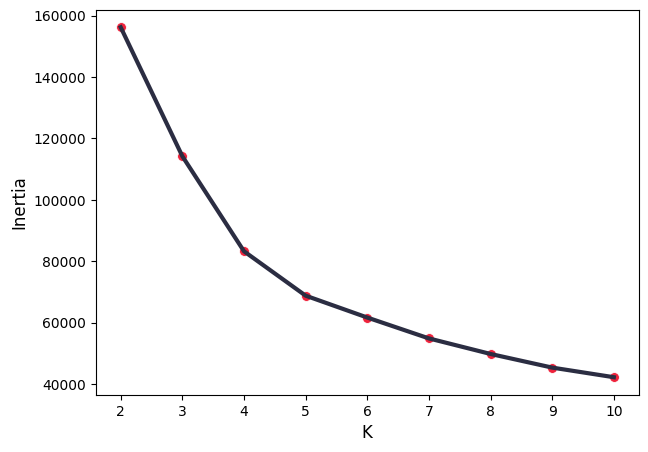

In [ ]:
plt.figure(figsize=(7, 5))


sns.lineplot(x=range(2, 11), y=inertia, color='#2b2d42', linewidth = 3)
sns.scatterplot(x=range(2, 11), y=inertia, s= 50, color='#ef233c')
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_std.values)

df_std['cluster'] = kmeans.labels_
df_std.head()

,Loyalty,Recency,Frequency,Monetary,cluster
0,1.492631,-0.946889,13.901949,26.850299,4
1,1.385498,-0.891581,8.634913,12.695563,4
2,0.706985,-0.415932,0.769473,12.582327,4
3,0.421296,-0.924766,9.828775,13.944971,4
4,0.921252,-0.515486,5.615146,13.213751,4


In [ ]:
# PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca

,PC 1,PC 2,cluster
0,21.018178,18.377845,4
1,11.018961,10.332280,4
2,6.410733,7.313539,4
3,11.995263,11.499413,4
4,9.370766,9.493563,4
...,...,...,...
57854,-2.348923,1.241178,3
57855,-1.787336,0.864024,3
57856,-0.146994,-0.829774,1
57857,0.667049,-2.124186,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

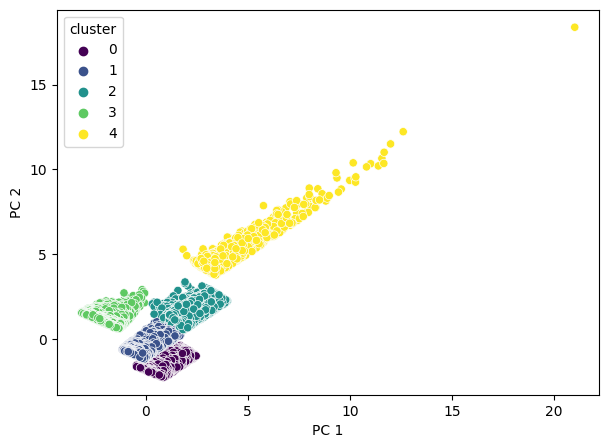

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2', hue='cluster',palette='viridis')

In [ ]:
# add cluster to data before scaling
df_lrfm['cluster'] = kmeans.labels_

df_lrfm.groupby('cluster').agg({
                            'Loyalty' : ['mean','median'],
                            'Recency' : ['mean','median'],
                            'Frequency' : ['mean','median'],
                            'Monetary' : ['mean','median'],

})

# Loyalty	Recency	Frequency	Monetary

Loyalty            Recency         Frequency              Monetary  \
              mean median        mean median       mean median           mean   
cluster                                                                         
0        80.773033   80.0  105.362008   81.0   9.623551    8.0   13718.244810   
1        29.684315   28.0   87.292480   71.0   9.840642    8.0   13978.903113   
2        63.323238   65.0   34.037468   17.0  36.321297   35.0   51934.075519   
3        37.921739   30.0  444.471846  429.0   4.062865    3.0    6205.842480   
4        69.462585   73.0   15.571429    7.0  73.801871   70.0  108257.778061   

                  
          median  
cluster           
0        11486.0  
1        11228.0  
2        49200.0  
3         4577.5  
4        98061.0

In [ ]:
df_lrfm['cluster'].value_counts()

1    23099
0    14403
3    14030
2     5151
4     1176
Name: cluster, dtype: int64

## Analysis
Cluster 0 =  High Loyalty, Mid Recency, Low Frequency, Low Monetary <br>
Cluster 1 =  Low Loyalty, Mid Recency, Low Frequency, Low Monetary<br>
Cluster 2 = Mid Loyalty, Low Recency, Mid Frequency, Mid Monetary <br>
Cluster 3 = Low Loyalty, High Recency, Low Frequency, Low Monetary <br>
Cluster 4 = Mid Loyalty, Mid Recency, High Frequency, High Monetary <br>